## Vanesa Pinzon

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
# cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("titanic-dataset.csv")
data.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.describe ()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isna () . sum ()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([89., 89., 89., 89., 89., 89., 89., 89., 89., 90.]),
 array([  1.,  90., 179., 268., 357., 446., 535., 624., 713., 802., 891.]),
 <BarContainer object of 10 artists>)

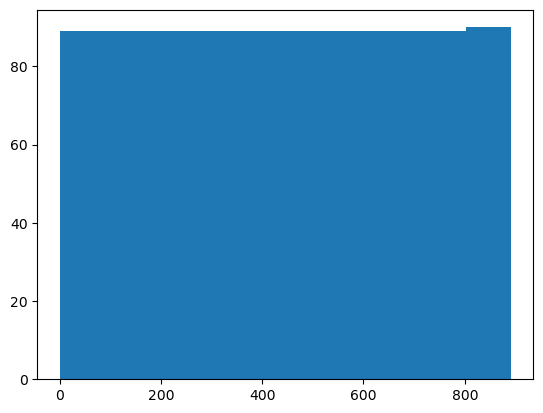

In [9]:
plt.hist(data.PassengerId)


<Axes: xlabel='Survived', ylabel='Pclass'>

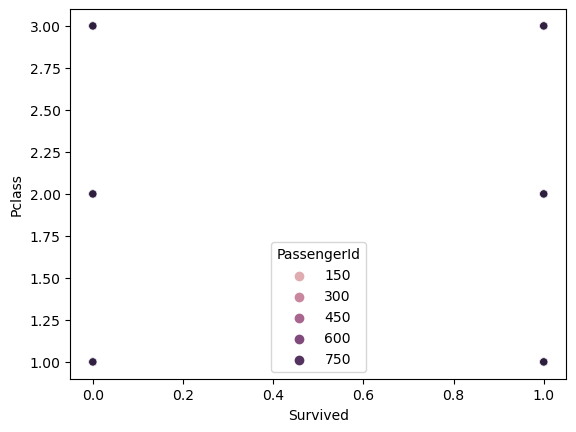

In [10]:
sns.scatterplot(x="Survived", y="Pclass", hue="PassengerId", data=data)


In [11]:
predictors_col = ["Survived", "Pclass", "Age", "SibSp"]
target_col = ['PassengerId']

In [12]:
predictors = data[predictors_col]
target = data[target_col]

In [13]:
predictors

,Survived,Pclass,Age,SibSp
0,0,3,22.0,1
1,1,1,38.0,1
2,1,3,26.0,0
3,1,1,35.0,1
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,1
889,1,1,26.0,0


In [14]:
target

,PassengerId
0,1
1,2
2,3
3,4
4,5
...,...
886,887
887,888
888,889
889,890


In [15]:
corr = predictors.corr ()
corr

,Survived,Pclass,Age,SibSp
Survived,1.000000,-0.338481,-0.077221,-0.035322
Pclass,-0.338481,1.000000,-0.369226,0.083081
Age,-0.077221,-0.369226,1.000000,-0.308247
SibSp,-0.035322,0.083081,-0.308247,1.000000


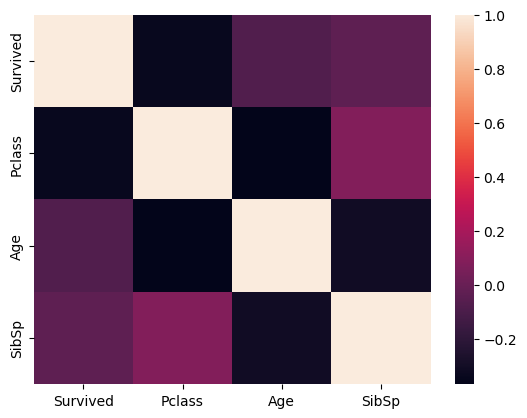

In [16]:
sns.heatmap(corr)
plt.show()

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

In [13]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [14]:
# Cargar el conjunto de datos Titanic desde seaborn
titanic = sns.load_dataset('titanic')

In [15]:
# Preprocesar el conjunto de datos
# Eliminar filas con valores nulos
titanic = titanic.dropna()

In [16]:
# Seleccionar características y la variable objetivo
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'sex']]
y = titanic['survived']

In [17]:
# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

In [18]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Crear y entrenar el modelo
arbol = DecisionTreeClassifier()
arbol.fit(X_train, y_train)

DecisionTreeClassifier()

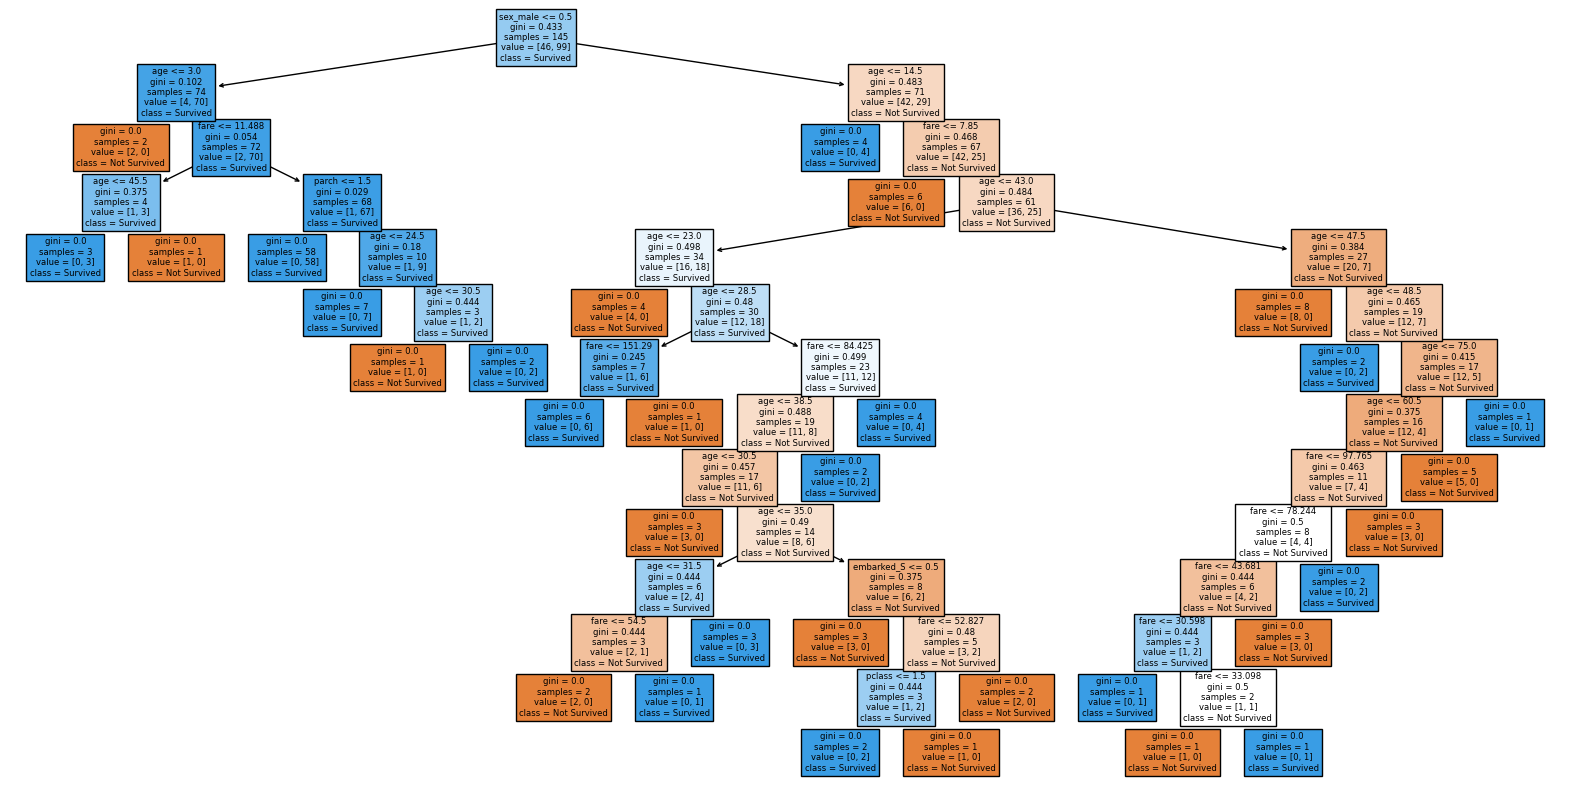

In [20]:
# Graficar el árbol
plt.figure(figsize=(20,10))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [21]:
predicciones = arbol.predict(X_test)

In [22]:
predicciones

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [24]:
# Crear la matriz de confusión utilizando pandas crosstab
confusion_df = pd.crosstab(y_test, predicciones, rownames=['Actual'], colnames=['Predicciones'])

In [25]:
# Mostrar la matriz de confusión
print(confusion_df)

Predicciones  0   1
Actual             
0             6   7
1             3  21


In [27]:
# Calcular la precisión
accuracy = accuracy_score(y_test, predicciones)

In [28]:
# Mostrar la precisión
print("Precisión:", accuracy)


Precisión: 0.7297297297297297
